<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2024/blob/main/tutorial/Tutorial_11_Titanic_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 453**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml   # for getting the data set

# Tutorial 11: Titanic Pandas

A quick intro to looking at Titanic data with a *very brief* intro on using Pandas.

**References**
* https://pandas.pydata.org/docs/user_guide/10min.html
* https://pandas.pydata.org/docs/user_guide/visualization.html
* The dataset: https://www.openml.org/search?type=data&status=active&id=40945
* https://www.encyclopedia-titanica.org/explorer/



Here's a picture of pandas on the Titanic I made with DALLE 2

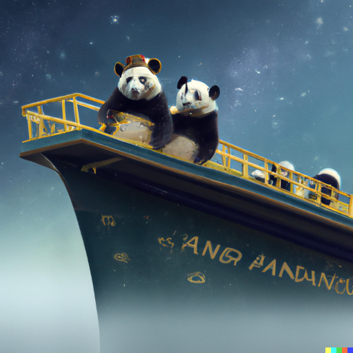

# Pandas Basics

A Pandas **dataframe** is essentially a spreadsheet with rows and columns, but vastly more powerful. A good place to start learning is here: https://pandas.pydata.org/docs/user_guide/10min.html

 I'll show just a few basics below.


In [ ]:
# Make a simple dataframe
x = np.linspace(0,3,4)
y = x**2
names = ['Abe','Bob','Cal','Dot']
df = pd.DataFrame({'Names':names,'x':x,'y':y})
df

,Names,x,y
0,Abe,0.0,0.0
1,Bob,1.0,1.0
2,Cal,2.0,4.0
3,Dot,3.0,9.0


In [ ]:
df.head(2)  # show first 2 rows, use "tail" for last rows

,Names,x,y
0,Abe,0.0,0.0
1,Bob,1.0,1.0


## Columns

In [ ]:
df.x  # Access a single column
# this returns a Pandas 'Series' (which is just a 1D dataframe with index and values).

,x
0,0.0
1,1.0
2,2.0
3,3.0


In [ ]:
df['x']  # Another way to do the same thing

,x
0,0.0
1,1.0
2,2.0
3,3.0


In [ ]:
df.x.values  # returns just the values

array([0., 1., 2., 3.])

In [ ]:
# View certain columns
df[['Names','x']]   # NOTE THE DOUBLE BRACKETS!

# A normal way to do this is to make a list like cols=['x','y'], then use df[cols]

,Names,x
0,Abe,0.0
1,Bob,1.0
2,Cal,2.0
3,Dot,3.0


In [ ]:
# Make a new column
df['z'] = df.x + df.y
df

,Names,x,y,z
0,Abe,0.0,0.0,0.0
1,Bob,1.0,1.0,2.0
2,Cal,2.0,4.0,6.0
3,Dot,3.0,9.0,12.0


## Searching Rows
We can give logical conditions to find matching rows.

Note that for combining conditions expressions MUST be in parentheses. The logical operators are: and=&, or=|, not=~


In [ ]:
df[df.x>=2]  # all rows where x>=2

,Names,x,y,z
2,Cal,2.0,4.0,6.0
3,Dot,3.0,9.0,12.0


In [ ]:
df[(df.x>=2) & (df.y>5)]

,Names,x,y,z
3,Dot,3.0,9.0,12.0


In [ ]:
df[df.Names=='Bob']  # find Bob

,Names,x,y,z
1,Bob,1.0,1.0,2.0


In [ ]:
df['Names'][0]

'Abe'

## Indexing Rows and Columns
To index a dataframe like a numpy array as [ROWS, COLS] use loc (labels) or iloc (integers).  Can use at and iat for single values.

Syntax is:  ```df.loc[row numbers, 'column name']``` or ```df.iloc[row numbers, col numbers]```

In [ ]:
df.loc[:,'y']  # all rows of y

,y
0,0.0
1,1.0
2,4.0
3,9.0


In [ ]:
df.iloc[2:, 2]  # last rows of column 2 (y)

,y
2,4.0
3,9.0


# Indexing Summary
The rules about rows and columns are CONFUSING:

1) Using brackets [ ] with dataframe is for column names:  ```df['column']```  

2) Exception: a single dataframe column is a pandas series where you can use brackets to access rows (to illustrate: ```df[0]``` does NOT work, but ```df['Names'][0]``` is 'Abe').  But be careful with using [chained indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy)

3) Logical expressions query rows: ```df[df.x>=2]``` returns all columns of df with rows that match condition

4) To index a dataframe like a numpy array with [ROWS, COLS] use loc, at, iloc, iat.  This is preferred to using multiple sets of brackets.





# Titanic Data

Now on to the big show.  This is our first example of *real world data*, which is a synomyn for **messy**.  

In [ ]:
# Load Titanic
data = fetch_openml(name="titanic",version=1, as_frame=True, parser='auto')

df_raw = data.frame # the raw data
df_raw.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


This dataset is fascinating.  Let's look at a few columns:
* pclass = Passenger Class 1, 2, or 3
* survived = 1 for people who survived, they will have a lifeboat number in boat and the body column should be blank.  Not all bodies are recovered.
* sibsp (Siblings/Spouses) = number of siblings (for kids) or spouses (for adults) aboard
* parch (Parents/Children) = number of parents (for kids) or children (for adults) aboard
* fare is in old British money (pounds / shillings / pence) which gives weird fractions

Notice the tradegies we see in the first 5 rows alone.  Miss Allen (row 0) is a first-class passenger traveling alone who survives.  Next we get the Allison family of four (rows 1-4).  The parents each have 1 spouse (sibsp) and 2 children (parch) aboard, the kids each have 1 sibling and 2 parents.  Only the 11-month old infant is put on a lifeboat and survives.


# Answering Questions

In [ ]:
df_raw.dtypes

,0
pclass,int64
survived,category
name,object
sex,category
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


Notice that we have 4 kinds of columns:  
* int64 = integers
* float64 = numbers with decimal points
* category = a few discrete options (e.g. sex = male or female, survived = 0 or 1) stored as text
* object = complicated stuff, usually text or mixed types

**Any column we want to use in sklearn needs to be an int64 or float64.**   
Later we will use built-in tools to change types.  For now, just be aware that the functions you can use depend on the type of the column.


## Numeric Columns

By default the **describe** command gives us info on numeric columns

In [ ]:
df_raw.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


We can do all of the typical math and statistics on numerical data

In [ ]:
df_raw.parch.max()

9

In [ ]:
df_raw[df_raw.parch==9]  # the parents with 9 kids on the Titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1180,3,0,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN


In [ ]:
df_raw[df_raw.sibsp==8] # their children

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1174,3,0,"Sage, Miss. Dorothy Edith 'Dolly'",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN


In [ ]:
df_raw[df_raw.survived=='1']['age'].mean()   # average age of survivors

28.918228103044495

In [ ]:
df_raw[df_raw.survived=='0']['age'].mean()   # average age of non-survivors

30.54536882067851

## Category Data
In general, we can not do math with category data *even if it looks like a number!*  Instead, we use these to sort and group data.  Useful tricks for categories are **unique**, **value_counts**, and **groupby**.

In [ ]:
df_raw.survived.value_counts()

,count
survived,
0,809
1,500


In [ ]:
df_raw.survived.describe() # describe works differently for categories

,survived
count,1309
unique,2
top,0
freq,809


In [ ]:
df_raw.embarked.unique() # shows unique values

['S', 'C', NaN, 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [ ]:
df_raw.pclass.value_counts() # value_counts is a very useful tool

,count
pclass,
3,709
1,323
2,277


In [ ]:
df_raw.pclass.value_counts().sort_index() # make them appear in 1,2,3 order

,count
pclass,
1,323
2,277
3,709


In [ ]:
df_raw.groupby('survived').size()

<ipython-input-28-049afed50c61>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_raw.groupby('survived').size()


,0
survived,
0,809
1,500


In [ ]:
df_raw.groupby(['survived','sex']).size()

<ipython-input-29-e1210b9df426>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_raw.groupby(['survived','sex']).size()


survived  sex   
0         female    127
          male      682
1         female    339
          male      161
dtype: int64

# Raw Data Plots
Before we mess with anything, take a look at what we've got

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

**IMPORTANT**: remember that numbers and categories are treated differently in plotting

## Numeric Plots

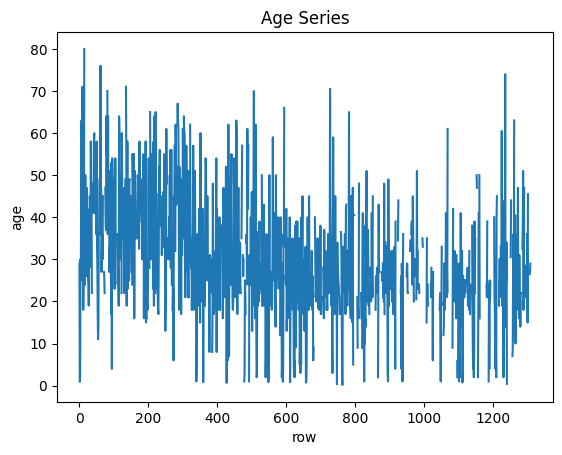

In [ ]:
df_raw.age.plot()
plt.title('Age Series')
plt.xlabel('row')
plt.ylabel('age')
plt.show()

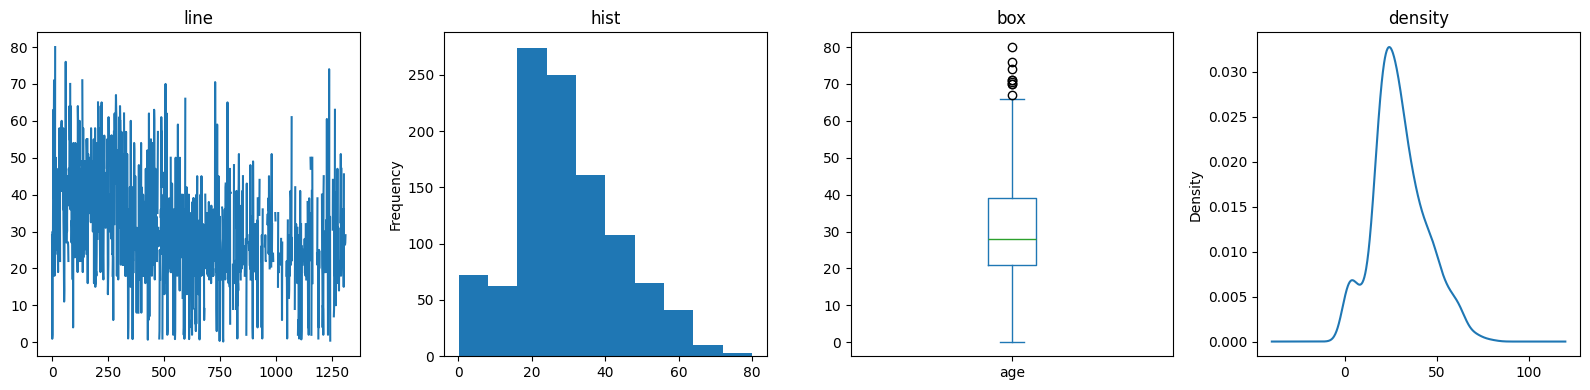

In [ ]:
# Different plot kinds for a numeric distribution
plt.figure(figsize=(16,4))
kinds = ['line','hist','box','density']
NUM = len(kinds)

for i in range(NUM):
  plt.subplot(1,NUM,i+1)
  kind = kinds[i]
  df_raw.age.plot(kind=kind)
  plt.title(kind)

plt.tight_layout()

## Category Plots

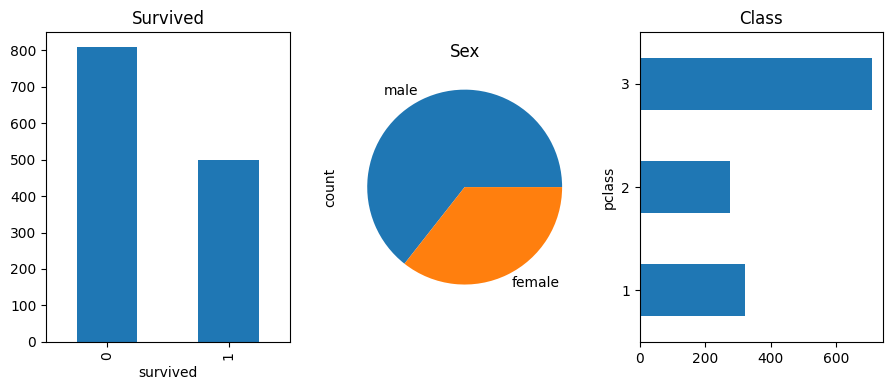

In [ ]:
# Use value_counts to get histograms
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
df_raw.survived.value_counts().plot(kind='bar')
plt.title('Survived')

plt.subplot(1,4,2)
df_raw.sex.value_counts().plot(kind='pie')
plt.title('Sex')

plt.subplot(1,4,3)
#df_raw.pclass.value_counts().plot(kind='barh')
df_raw.pclass.value_counts().sort_index().plot(kind='barh') # sorting index
plt.title('Class')

plt.tight_layout()
plt.show()

The ```by``` keyword adds the groupby functionality to plots!

<ipython-input-57-55d0892dd3e7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_raw[['age','fare','survived']].plot(kind='box', subplots=True, by='survived')


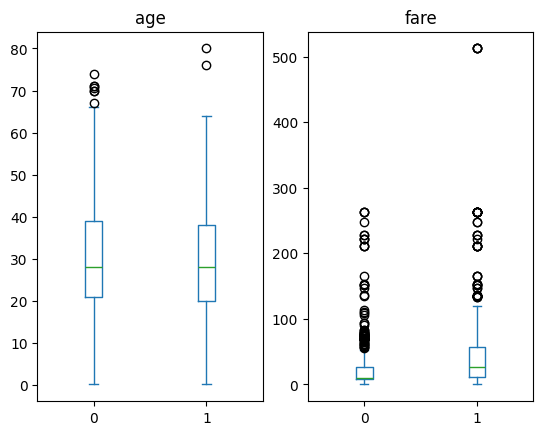

In [ ]:
df_raw[['age','fare','survived']].plot(kind='box', subplots=True, by='survived')
plt.show()

## Everything Plots
You can cram an amazing amount of information into a scatter plot!

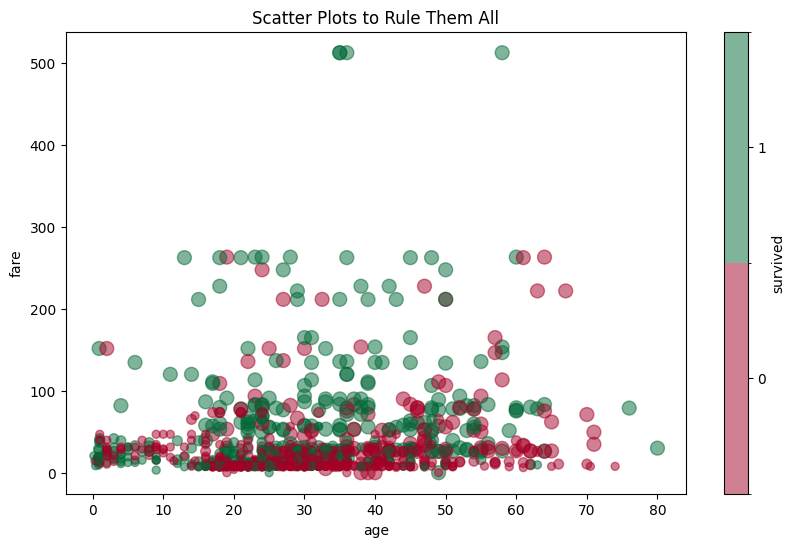

In [ ]:
df_raw.plot(x='age', y='fare',kind='scatter',c='survived',colormap='RdYlGn',s=100/df_raw['pclass'],alpha=0.5,figsize=(10,6))
plt.title('Scatter Plots to Rule Them All')
plt.show()